# MNIST data set
We will use Softmax Regression to classify the MNIST data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
def create_data_sets(n_train, n_test):

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train/255, x_test/255
    
    x = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation]
    y = y[permutation]
    
    return train_test_split(x, y, train_size=n_train, test_size=n_test)

shape of train set (10000, 28, 28), (10000,)
shape of test set (2000, 28, 28), (2000,)


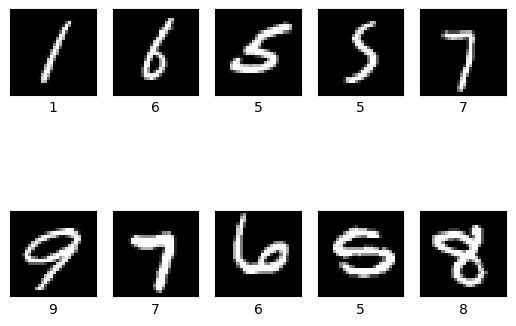

In [3]:
# create and inspect the data sets
n_train, n_test = 10**4, 2*10**3
x_train, x_test, y_train, y_test = create_data_sets(n_train, n_test)

print(f'shape of train set {x_train.shape}, {y_train.shape}')
print(f'shape of test set {x_test.shape}, {y_test.shape}')

# plot some training examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap= 'gray')
    plt.xlabel(f'{y_train[i]}')
    plt.xticks(())
    plt.yticks(())

shape of scaled training set is (10000, 784)


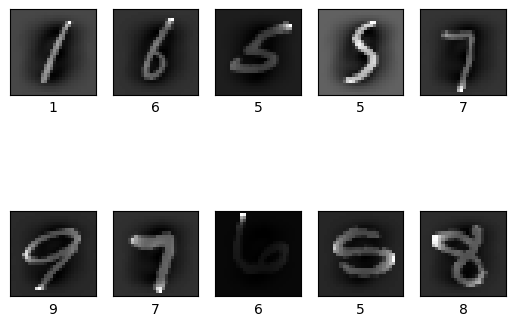

In [4]:
# preprocess the data to have zero mean, and 1 sd
from sklearn.preprocessing import StandardScaler
x_train_scaled = StandardScaler().fit_transform(x_train.reshape(x_train.shape[0], -1))
x_test_scaled = StandardScaler().fit_transform(x_test.reshape(x_test.shape[0], -1))

print(f'shape of scaled training set is {x_train_scaled.shape}')

# plot some training examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_scaled[i].reshape( 28, 28), cmap= 'gray')
    plt.xlabel(f'{y_train[i]}')
    plt.xticks(())
    plt.yticks(())

In [5]:
x_train_raw = x_train.reshape(x_train.shape[0], -1)
x_test_raw = x_test.reshape(x_test.shape[0], -1)

# Use scikit-learn classification model
Examine the following
- raw data vs scaled preprocessed data
- L1 vs L2 normalization
- SGD vs LogisticRegression classifiers

In [6]:
# scaled vs unscaled data

def model_sgd(x_train, x_test, y_train, y_test, n_iter):
    sgd_model = linear_model.SGDClassifier(loss='log_loss', penalty='l2', max_iter=n_iter)

    sgd_model.fit(x_train, y_train)
    accuracy_train = sgd_model.score(x_train, y_train)
    accuracy_test = sgd_model.score(x_test, y_test)
    return accuracy_train, accuracy_test

iterations = [5, 10, 20, 50, 100]
accuracies_train_raw = []
accuracies_test_raw = []
accuracies_train_scaled = []
accuracies_test_scaled = []

for n_iter in iterations:
    accuracy_train, accuracy_test = model_sgd(x_train_raw, x_test_raw, y_train, y_test, n_iter)
    accuracies_train_raw.append(accuracy_train)
    accuracies_test_raw.append(accuracy_test)
    accuracy_train, accuracy_test = model_sgd(x_train_scaled, x_test_scaled, y_train, y_test, n_iter)
    accuracies_train_scaled.append(accuracy_train)
    accuracies_test_scaled.append(accuracy_test)

c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Deskto

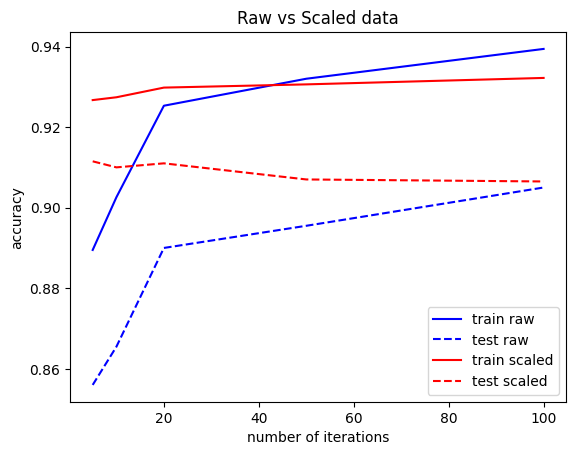

In [7]:
plt.plot(iterations, accuracies_train_raw, label='train raw', c = 'b')
plt.plot(iterations, accuracies_test_raw, label = 'test raw', c='b', linestyle = 'dashed')
plt.plot(iterations, accuracies_train_scaled, label='train scaled', c = 'r')
plt.plot(iterations, accuracies_test_scaled, label = 'test scaled', c = 'r', linestyle = 'dashed')
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.title('Raw vs Scaled data')
plt.legend()
plt.show()

In [8]:
# examine regularization; use the scaled data

def model_sgd_reg(x_train, x_test, y_train, y_test, lambda_reg, type_reg = 'l1'):
    sgd_model = linear_model.SGDClassifier(loss='log_loss', penalty=type_reg, max_iter=20, alpha= lambda_reg)

    sgd_model.fit(x_train, y_train)
    accuracy_train = sgd_model.score(x_train, y_train)
    accuracy_test = sgd_model.score(x_test, y_test)
    return accuracy_train, accuracy_test


lambda_reg = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2]
accuracies_train_l1 = []
accuracies_test_l1 = []
accuracies_train_l2 = []
accuracies_test_l2 = []

for l in lambda_reg:
    accuracy_train, accuracy_test = model_sgd_reg(x_train_scaled, x_test_scaled, y_train, y_test, l, 'l1')
    accuracies_train_l1.append(accuracy_train)
    accuracies_test_l1.append(accuracy_test)
    accuracy_train, accuracy_test = model_sgd_reg(x_train_scaled, x_test_scaled, y_train, y_test, l, 'l2')
    accuracies_train_l2.append(accuracy_train)
    accuracies_test_l2.append(accuracy_test)
    

c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\USER\Deskto

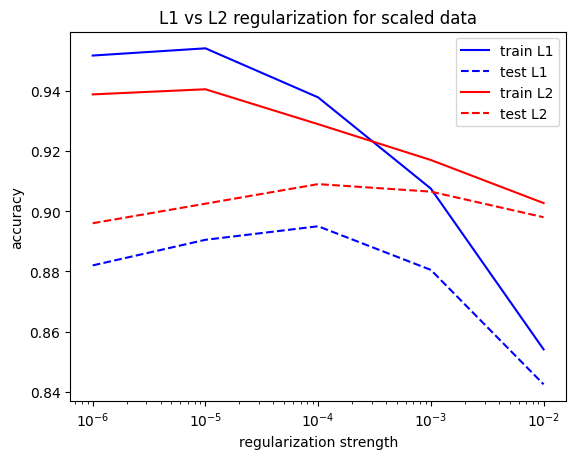

In [9]:
plt.plot(lambda_reg, accuracies_train_l1, label='train L1', c = 'b')
plt.plot(lambda_reg, accuracies_test_l1, label = 'test L1', c ='b', linestyle = 'dashed')
plt.plot(lambda_reg, accuracies_train_l2, label='train L2', c = 'r')
plt.plot(lambda_reg, accuracies_test_l2, label = 'test L2', c = 'r', linestyle = 'dashed')
plt.xscale('log')
plt.xlabel('regularization strength')
plt.ylabel('accuracy')
plt.title('L1 vs L2 regularization for scaled data')
plt.legend()
plt.show()

In [10]:
# use Logistic Regrassion class with different solvers
def model_log_reg(x_train, x_test, y_train, y_test, sol):
    model = linear_model.LogisticRegression(C=10**4, penalty='l2', solver = sol)
    model.fit(x_train, y_train)

    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)
    
    return accuracy_train, accuracy_test

# solvers: ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
accuracies_sol_train = []
accuracies_sol_test = [] 

for sol in solvers:
    accuracy_train, accuracy_test = model_log_reg(x_train_scaled, x_test_scaled, y_train, y_test, sol)
    accuracies_sol_train.append(accuracy_train)
    accuracies_sol_test.append(accuracy_test)
    print(f'accuracy on the train set is {accuracy_train}, on test set is {accuracy_test}')

accuracy on the train set is 1.0, on test set is 0.8665
accuracy on the train set is 1.0, on test set is 0.8595


c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy on the train set is 0.9461, on test set is 0.9115
accuracy on the train set is 0.939, on test set is 0.9145


c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


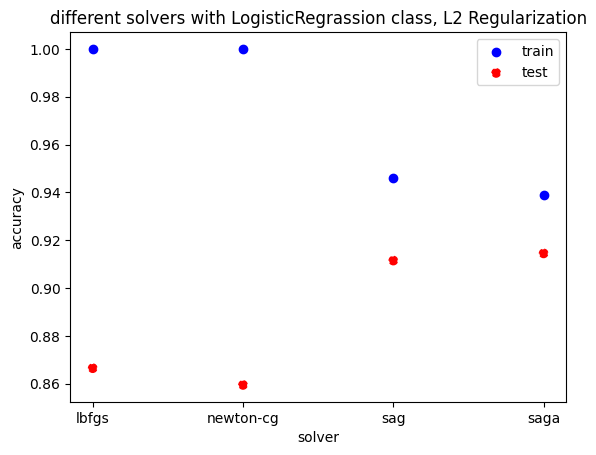

In [11]:
plt.scatter(solvers, accuracies_sol_train, label='train', c = 'b')
plt.scatter(solvers, accuracies_sol_test, label = 'test', c ='r', linestyle = 'dashed')

# plt.xscale('log')
plt.xlabel('solver')
plt.ylabel('accuracy')
plt.title('different solvers with LogisticRegrassion class, L2 Regularization')
plt.legend()
plt.show()

# Error Analysis

In [12]:
# error analysis
def error_analysis(x, y, y_hat):
    ''' get the true and predicted labels and return a dictionary
    of dictionaries with the total number of misclassification for each
    digit and misclasified class
    '''

    # find the examples which are incorrectly classified
    mask = np.logical_not(y == y_hat)
    x_wrong = x[mask]
    y_wrong = y[mask]
    y_hat_wrong = y_hat[mask]

    print(f'number of misclasified examples are {y_wrong.size} out of {y.size}')
    print(f'some misclasified examples')
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_wrong[i], cmap='grey')
        plt.xlabel(f'{y_wrong[i]} as {y_hat_wrong[i]}')
        plt.xticks(())
        plt.yticks(())

    d = {i:{j:0 for j in range(10)} for i in range(10)}
    for i in range(y_wrong.size):
        d[y_hat_wrong[i]][y_wrong[i]] +=1

    return d, y_wrong.size

def plot_misclassification_percentage_digits(d, n_wrong):
    '''plot the percentage of the misclassified examples for each digit 
    in comparison with the total number of misclassified examples
    '''

    values = [100*sum([v for v in d[i].values()])/n_wrong for i in d]
    plt.figure(figsize=(5,3))
    plt.bar(d.keys(), values)
    plt.xlabel('digit')
    plt.ylabel('%')
    plt.title('percentege of misclasification per digit')
    plt.xticks([i for i in range(10)])
    plt.show()

def plot_breakdown_percentagies(d, y_true):
    '''plot the percentage of misclasified digits in comparison with all 
    examples of that digit
    '''

    digits_freq_wrong = np.array([sum([v for v in d[i].values()]) for i in d])
    digits, digits_freq = np.unique(y_true, return_counts=True)
    accuracy_digits = 100*digits_freq_wrong/digits_freq
    plt.figure(figsize=(5,3))
    plt.bar(digits, accuracy_digits)
    plt.xticks(digits)
    plt.xlabel('digit')
    plt.ylabel('%')
    plt.title('percentage breakdown of misclassified examples')
    plt.show()

def plot_misclassified_as(d):
    for i in range(10):
        plt.figure(figsize=(4,2))
        plt.bar(d[i].keys(), d[i].values())
        plt.xticks(np.arange(10))
        plt.xlabel(f'digit {i} classified as')
        plt.ylabel('number of examples')
        plt.show()

c:\Users\USER\Desktop\Venv ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


number of misclasified examples are 178 out of 2000
some misclasified examples


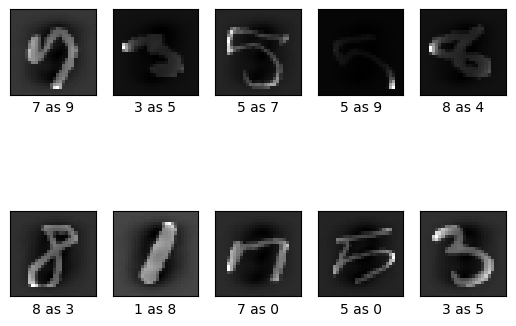

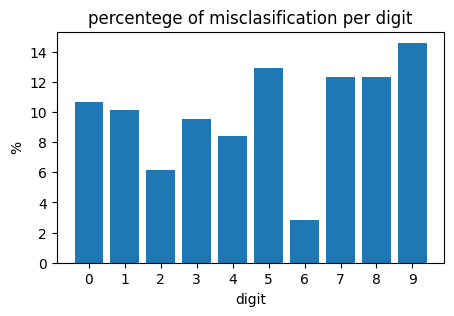

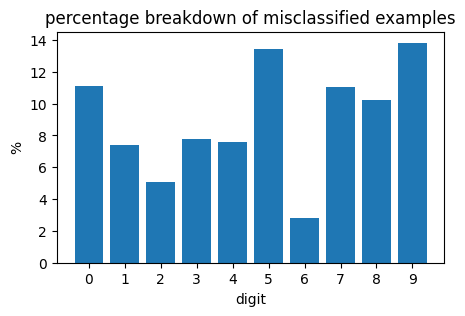

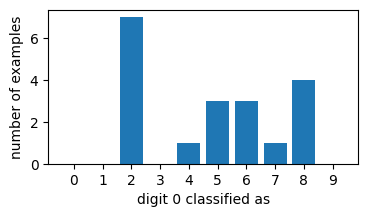

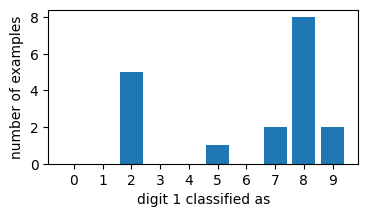

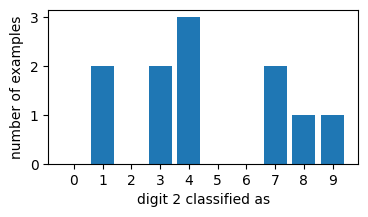

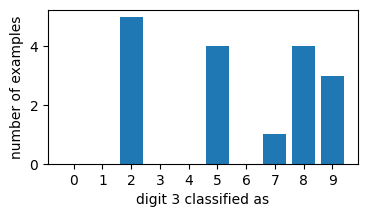

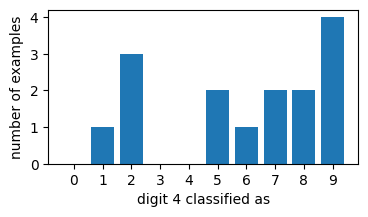

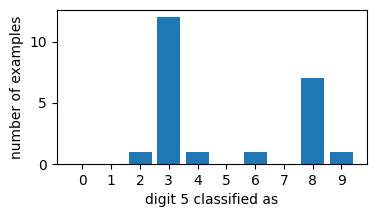

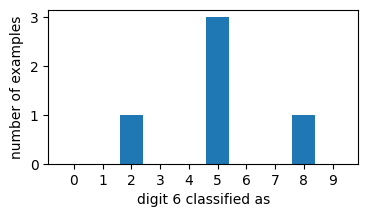

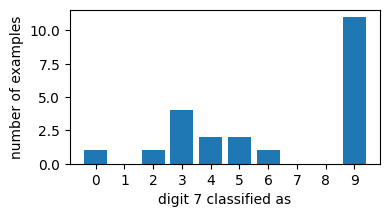

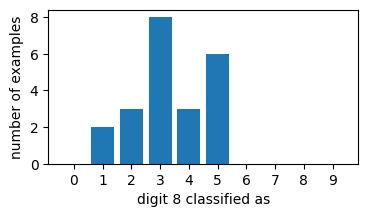

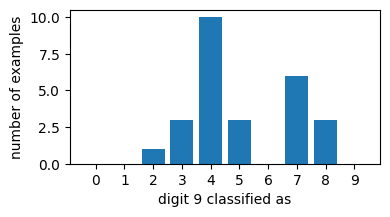

In [13]:
# perform some error analysis; use LogReg model 

model = linear_model.LogisticRegression(C=10**4, penalty='l2', solver = 'sag')
model.fit(x_train_scaled, y_train)
y_hat_test = model.predict(x_test_scaled)
d, n_wrong = error_analysis(x_test_scaled.reshape(-1, 28, 28), y_test, y_hat_test)
plot_misclassification_percentage_digits(d, n_wrong)
plot_breakdown_percentagies(d, y_test)
plot_misclassified_as(d)